# Perceptron

Implements a Multilayer Perceptron for fitting 1D data.

## Imports libraries

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import argparse

## Creates perceptron class with all computations

In [7]:
class Perceptron(object):
    """
    A perceptron with online updating.
    """

    def __init__(self):
        self.W = None  # type: np.ndarray
        self.id2label = None  # type: dict
        self.label2id = None  # type: dict

    def fit(self, x_train, y_train, lr=0.01, epochs=100):
        """
        Fits the perceptron to input data.

        :param x_train: the input variables for the problem.
        :param y_train: the actual label for input data.
        :param lr: optional: learning rate. Defaults to 0.01.
        :param epochs: optional: how many steps to update the weights. Defaults to 100.
        """
        if self.W is None:
            self.W = np.random.random(x_train.shape[1] + 1).astype(float)
        X = np.hstack((np.ones((x_train.shape[0], 1)), x_train)).astype(float)
        Y, self.label2id, self.id2label = Perceptron.__string_to_int__(y_train)

        iteration = 0

        while iteration < epochs:
            for i, x in enumerate(X):
                h = Perceptron.__predict__(x, self.W)
                j = Perceptron.__cost_function__(1, h, Y[i])
                if j > 0:
                    W = Perceptron.__update_theta__(lr, self.W, h, x, Y[i])
            iteration += 1

        return self

    def predict(self, x):
        """
        Predicts values for a set of x inputs.

        :param x: input data.
        :return: predictions for x.
        """
        x = np.vstack((np.ones(x.shape[0]), x)).T
        return Perceptron.__predict__(x, self.W)

    @staticmethod
    def __predict__(X, W):
        return np.sign(np.dot(X, W))

    @staticmethod
    def __cost_function__(N, H, Y):
        return (1.0 / (2.0 * float(N))) * np.sum(np.power(H - Y, 2))

    @staticmethod
    def __update_theta__(alpha, W, h, x, y):
        for i, w in enumerate(W):
            W[i] = w - (alpha * (h - y) * x[i])
        return W

    @staticmethod
    def __activation_function__(x):
        return np.sign(x)

    @staticmethod
    def __string_to_int__(Y: np.ndarray):
        values = np.unique(Y)
        id2label = {i: k for i, k in enumerate(values)}
        label2id = {k: i for i, k in id2label.items()}

        return Y, label2id, id2label

## Creates function for visualizing projections

In [8]:
def plot_model(fig, ax, title, model, x, y):
    x_axis = np.linspace(np.min(x), np.max(y) + 1)
    y_axis = model.predict(x_axis)

    ax.plot(x_axis, y_axis, label='h(x)', c='#F2D0A4', zorder=0)
    ax.scatter(x, y, label='y', c='#C03221', zorder=1)
    ax.set_title(title)
    fig.legend()

## Creates function for training and projection

In [9]:
def static_projection(x_train, y_train):
    fig, ax = plt.subplots(nrows=2)
    ax = np.ravel(ax)

    epochs = 2
    model = Perceptron()
    model = model.fit(x_train, y_train, lr=0.01, epochs=epochs)
    plot_model(
        fig, ax[0],
        f'model trained for {epochs} epochs\nModel weights: {np.around(model.W, 2)}', model, x_train, y_train
    )

    epochs = 98
    model = model.fit(x_train, y_train, lr=0.01, epochs=epochs)
    plot_model(
        fig, ax[1],
        f'model trained for {epochs} more epochs\nModel weights: {np.around(model.W, 2)}', model, x_train, y_train
    )
    plt.tight_layout()
    plt.show()

## Creates dataset and calls function

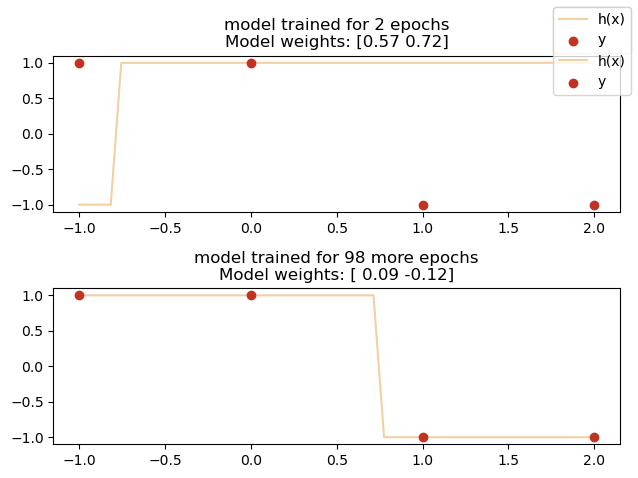

In [10]:
_x_train = np.array([1, 2, 0, -1]).reshape(4, 1)
_y_train = np.array([-1, -1, 1, 1]).reshape(4, 1)
static_projection(_x_train, _y_train)